# Sawblade analysis

In [1]:
# Imports
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from k_means_constrained import KMeansConstrained

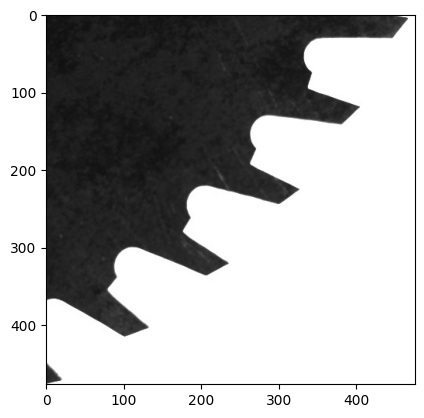

In [2]:
# Load the image
image = cv2.imread('../../data/sawblade.png')

# Convert it to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image)
plt.show()

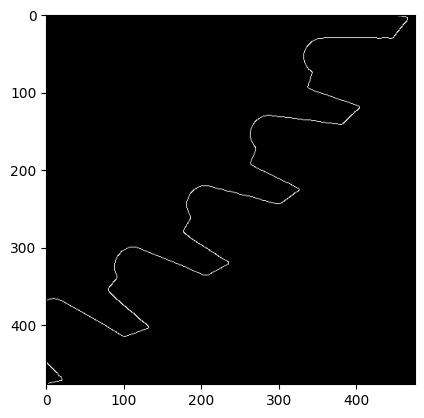

In [3]:
# Threshold
ret, treshold_output = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)

# Canny edge detection
canny = cv2.Canny(treshold_output, 50, 200, None, 3)

# Show
plt.imshow(canny, cmap='gray')
plt.show()

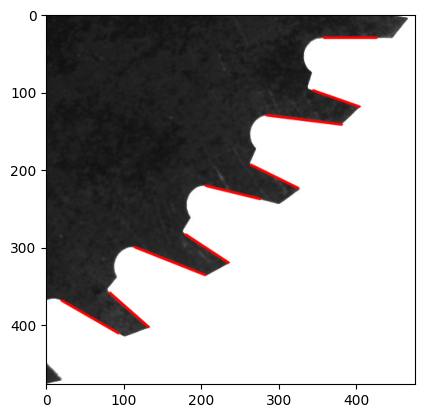

In [4]:
# Probablistic Hough Transform
lines = cv2.HoughLinesP(canny, 1, np.pi / 18000, 50, None, 50, 3)

# Get points 
points = []
for i in range(0, len(lines)):
    l = lines[i][0]
    cv2.line(image, (l[0], l[1]), (l[2], l[3]), (255, 0, 0), 2, cv2.LINE_AA)
    points.append([l[0],l[1]])
    points.append([l[2], l[3]])

# Plot
plt.imshow(image)
plt.show()

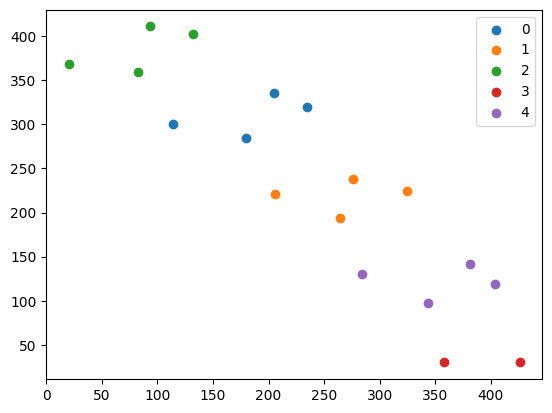

In [5]:
# Cluster points by teeth
points = np.array(points)
kmeans = KMeansConstrained(n_clusters=5, size_min=2, size_max=4, random_state=0).fit(points)
label = kmeans.fit_predict(points)
labels = np.unique(label)

# Plotting the results:
for i in labels:
    plt.scatter(points[label == i, 0], points[label == i, 1], label=i)
plt.legend()
plt.show()

In [6]:
# Grouping lines togheter for every tooth
lines = []
for i in range(max(kmeans.labels_)+1):
    sublist = []
    for i_label in range(len(kmeans.labels_)):
        if kmeans.labels_[i_label] == i:
            sublist.append(points[i_label])
    lines.append(sublist)

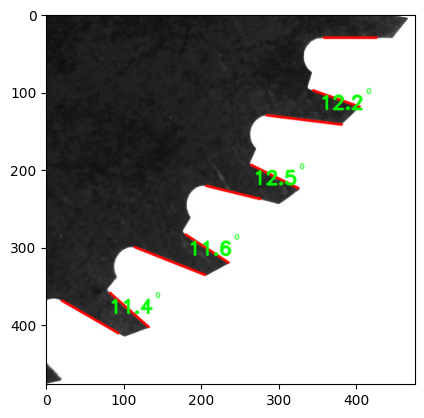

In [7]:
# Calculate angle for every cluster
angles = []
for i in range(len(lines)):
    if len(lines[i]) > 2:
        rico_line1 = (lines[i][1][1] - lines[i][0][1]) / (lines[i][1][0] - lines[i][0][0])
        rico_line2 = (lines[i][3][1] - lines[i][2][1]) / (lines[i][3][0] - lines[i][2][0])
        angle_rad_1 = math.atan(rico_line1)
        angle_rad_2 = math.atan(rico_line2)
        angle_rad = angle_rad_2 - angle_rad_1
        angle_deg = angle_rad / math.pi * 180
        angles.append([round(angle_deg,1), kmeans.cluster_centers_.tolist()[i]])

# Visualise angles on the original image
font = cv2.FONT_HERSHEY_SIMPLEX
for i in angles:
    angle = i[0]
    x = int(i[1][0])
    y = int(i[1][1])
    string = str(angle)
    cv2.putText(image, string, (x,y), font, 0.8, (0,255,0), 2, cv2.LINE_AA)
    cv2.putText(image, "0", (x+60,y-20), font, 0.3, (0,255,0), 1, cv2.LINE_AA)

# Show
plt.imshow(image)
plt.show()